In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Load the dataset with specified encoding
df = pd.read_csv("/content/drive/MyDrive/ML Intern/TeePublic_review.csv", encoding='latin1')

In [4]:
df.head(10)

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4
5,5.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Always top notch,Always top notch customer service. Never have ...,5
6,6.0,US,37.090240,-95.712891,2023,6,2019 00:00:00,Recent review,I have messaged sellers and get no response at...,4
7,7.0,US,37.090240,-95.712891,2023,6,2023 00:00:00,Great communication,Great communication. They let me know it was a...,5
8,8.0,CA,56.130366,-106.346771,2023,6,2021 00:00:00,Awesome,"Very impressed with the quality, I had a hard ...",5
9,9.0,US,37.090240,-95.712891,2023,6,2014 00:00:00,Wonderful quality T-shirts for anï¿½ï¿½ï¿½,Wonderful quality T-shirts for an amazing pric...,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278100 entries, 0 to 278099
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_id     278099 non-null  float64
 1   store_location  278100 non-null  object 
 2   latitude        278100 non-null  float64
 3   longitude       278100 non-null  float64
 4   date            278100 non-null  int64  
 5   month           278100 non-null  int64  
 6   year            278100 non-null  object 
 7   title           278091 non-null  object 
 8   review          247597 non-null  object 
 9   review-label    278100 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 21.2+ MB


In [6]:
df.duplicated().sum()


0

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
# Convert text to lowercase
df['review'] = df['review'].str.lower()

In [9]:

# Remove punctuation
df['review'] = df['review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove extra whitespaces
df['review'] = df['review'].apply(lambda x: ' '.join(x.split()))


In [10]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

In [11]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))


In [12]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [13]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [14]:
# Save cleaned dataset to a new CSV file
df.to_csv("cleaned_tee_public_reviews.csv", index=False)

## Data Analysis

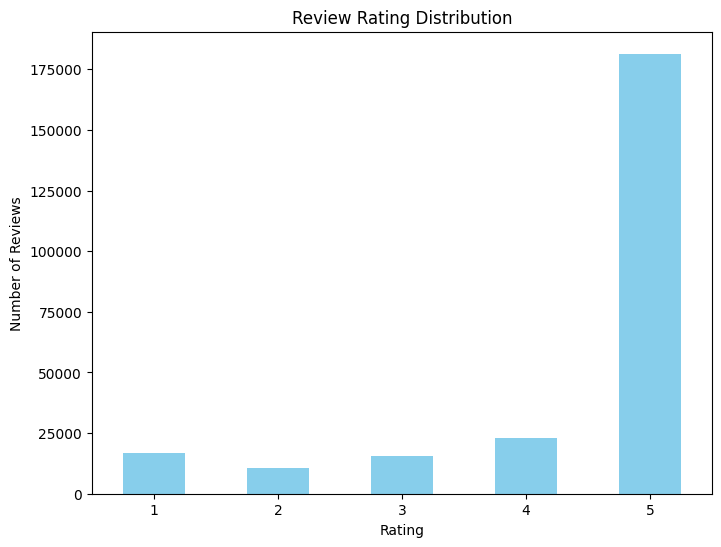

In [15]:
# Review Rating Distribution
plt.figure(figsize=(8, 6))
df['review-label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Review Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


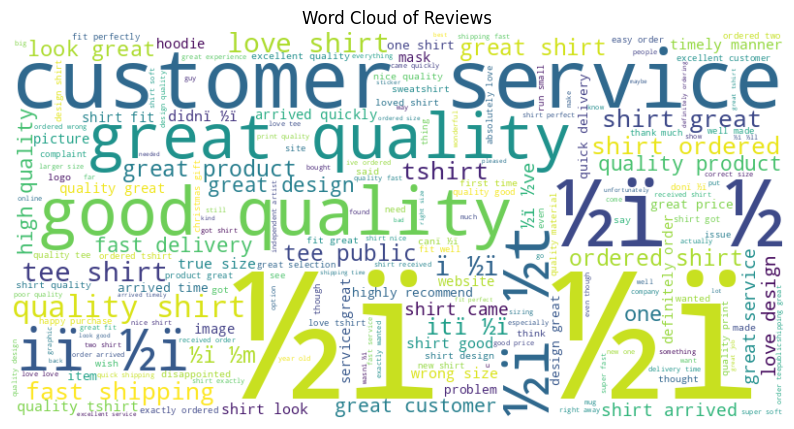

In [16]:
# Word Frequency Analysis
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['review']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()

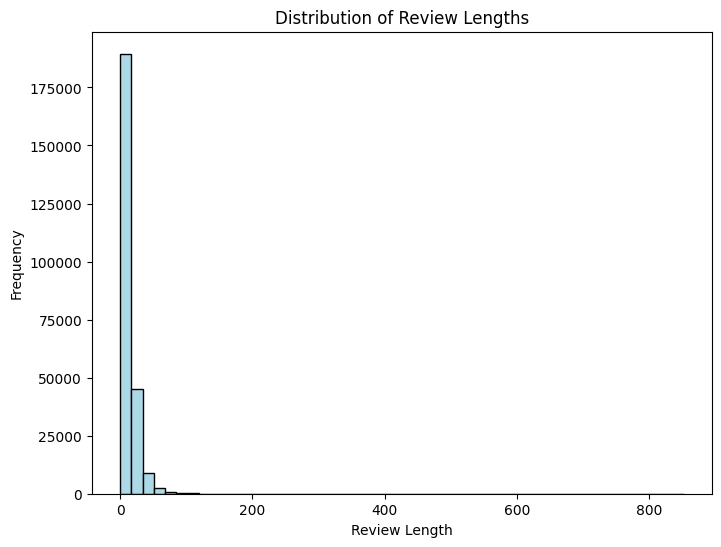

In [17]:
# Review Length Analysis
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
plt.hist(df['review_length'], bins=50, color='lightblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


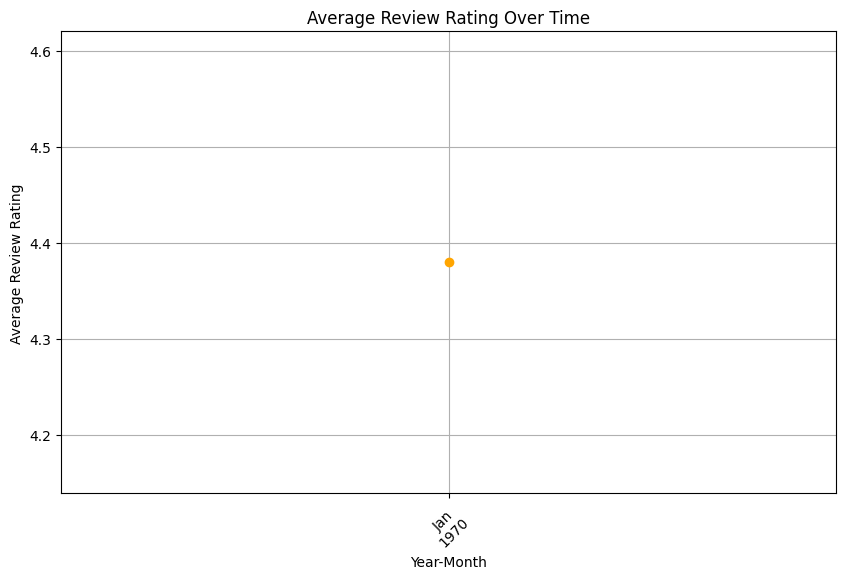

In [18]:
# Temporal Analysis (Assuming there's a 'date' column)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['year_month'] = df['date'].dt.to_period('M')
    plt.figure(figsize=(10, 6))
    df.groupby('year_month')['review-label'].mean().plot(marker='o', color='orange')
    plt.title('Average Review Rating Over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Average Review Rating')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("No 'date' column found for temporal analysis.")

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['review-label'], test_size=0.2, random_state=42)


In [20]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [21]:
# Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [22]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_len))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))


In [23]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
# Adjust label values to be in the range [0, 4]
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Train the model with adjusted labels
history = model.fit(X_train_padded, y_train_adjusted, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/10
  22/2476 [..............................] - ETA: 1:08:06 - loss: 1.1908 - accuracy: 0.6896

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)